In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.layers import Dropout
import matplotlib.pyplot as plt

df = pd.read_csv('GDP.csv', parse_dates = ['observation_date'], index_col = 'observation_date')

predictors = ['INDPRO', 'TCU', 'RSAFS', 'UMCSENT', 'HSN1F',
              'TTLCONS', 'PERMIT', 'HOUST', 'CPIAUCSL', 'DCOILWTICO', 'DCOILBRENTEU',
              'M1SL', 'M2SL', 'UNRATE', 'ICSA', 'PAYEMS', 'IRLTLT01USM156N',
              'FEDFUNDS', 'NASDAQCOM', 'BOPGSTB', 'MORTGAGE30US']

# add a column of ones to the predictors
X = np.hstack([df[predictors].values, np.ones((df.shape[0], 1))])

y = df["GDP"]

train_end_date = pd.to_datetime('2018-01-01')
val_end_date = pd.to_datetime('2020-01-01')
test_end_date = pd.to_datetime('2023-01-31')

X_train = X[df.index <= train_end_date]
X_validation = X[(df.index > train_end_date) & (df.index <= val_end_date)]
X_test = X[df.index > val_end_date]

y_train = y[df.index <= train_end_date]
y_validation = y[(df.index > train_end_date) & (df.index <= val_end_date)]
y_test = y[df.index > val_end_date]

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_validation = np.reshape(X_validation, (X_validation.shape[0], X_validation.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

y_train = np.array(y_train)
y_validation = np.array(y_validation)
y_test = np.array(y_test)

from tensorflow.keras.layers import Layer
import tensorflow as tf
import numpy as np

class RBFLayer(Layer):
    def __init__(self, units, gamma=1.0, **kwargs):
        self.units = units
        self.gamma = gamma
        super(RBFLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        self.centers = self.add_weight(name='centers',
                                        shape=(self.units, input_shape[1]),
                                        initializer='uniform',
                                        trainable=True)
        super(RBFLayer, self).build(input_shape)

    def call(self, inputs):
        inputs = tf.expand_dims(inputs, axis=1)
        diff = tf.subtract(inputs, self.centers)
        norm = tf.reduce_sum(tf.square(diff), axis=-1)
        return tf.exp(-self.gamma * norm)

model = Sequential()
model.add(LSTM(128, input_shape=(X_train.shape[1],1), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(64))
model.add(Dropout(0.2))
model.add(RBFLayer(64))
model.add(Dense(500, activation='relu'))
model.add(Dense(250, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error', metrics=["mean_absolute_error"])


model.compile(optimizer='adam', loss='mean_squared_error', metrics = ["mean_absolute_error"])

history = model.fit(X_train, y_train, epochs=2000, batch_size=128, validation_data=(X_validation, y_validation))


Epoch 1/5
1/1 [==============================] - 10s 10s/step - loss: 224845168.0000 - mean_absolute_error: 14724.7549 - val_loss: 446647360.0000 - val_mean_absolute_error: 21129.8281
Epoch 2/5
1/1 [==============================] - 0s 238ms/step - loss: 224844528.0000 - mean_absolute_error: 14724.7324 - val_loss: 446647040.0000 - val_mean_absolute_error: 21129.8203
Epoch 3/5
1/1 [==============================] - 0s 310ms/step - loss: 224844352.0000 - mean_absolute_error: 14724.7256 - val_loss: 446646624.0000 - val_mean_absolute_error: 21129.8086
Epoch 4/5
1/1 [==============================] - 0s 265ms/step - loss: 224844096.0000 - mean_absolute_error: 14724.7188 - val_loss: 446646144.0000 - val_mean_absolute_error: 21129.7969
Epoch 5/5
1/1 [==============================] - 0s 317ms/step - loss: 224843744.0000 - mean_absolute_error: 14724.7051 - val_loss: 446645312.0000 - val_mean_absolute_error: 21129.7773


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
df

,GDP,INDPRO,TCU,RSAFS,UMCSENT,HSN1F,TTLCONS,PERMIT,HOUST,CPIAUCSL,...,ICSA,PAYEMS,IRLTLT01USM156N,FEDFUNDS,NASDAQCOM,BOPGSTB,MORTGAGE30US,A229RX0,USEPUINDXD,PSAVERT
observation_date,,,,,,,,,,,,,,,,,,,,,
2000-01-01,10002.179,91.7514,82.1834,271752.0,110.1,876.0,796045.0,1690.0,1659.0,170.100,...,285846.0,131245.0,6.48,5.68,4427.873492,-29161.0,8.26,33208.0,57.87,4.6
2000-04-01,10247.720,92.8763,82.3517,271954.0,108.8,830.0,801727.0,1571.0,1587.0,171.433,...,280846.0,132017.0,6.18,6.27,3747.218571,-29389.0,8.32,33521.0,68.27,4.8
2000-07-01,10318.165,92.8028,81.4704,274365.0,107.5,882.0,801155.0,1555.0,1504.0,173.000,...,301929.0,132271.0,5.89,6.52,3933.188413,-31505.0,8.02,33863.0,56.38,4.9
2000-10-01,10435.744,92.5498,80.4446,276249.0,103.9,932.0,815890.0,1578.0,1544.0,174.233,...,328538.0,132541.0,5.57,6.47,3026.412857,-33174.0,7.62,33984.0,109.84,4.6
2001-01-01,10470.231,91.4115,78.6768,278019.0,92.3,946.0,818728.0,1671.0,1605.0,175.900,...,367769.0,132745.0,5.05,5.59,2355.525161,-32438.0,7.01,34182.0,123.35,5.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-01,25248.476,102.7528,80.6043,676372.0,57.9,609.0,1792820.0,1738.0,1647.0,291.536,...,214923.0,152044.0,2.93,0.77,12195.240000,-84065.0,5.27,45066.0,134.51,3.2
2022-07-01,25723.941,103.2985,80.7602,678876.0,56.1,580.0,1807710.0,1597.0,1450.0,295.496,...,206000.0,153331.0,3.11,2.19,11891.069840,-68988.0,5.62,45358.0,125.38,3.2
2022-10-01,26137.992,102.6531,79.9379,679866.0,58.8,598.0,1829048.0,1400.0,1398.0,298.525,...,207857.0,154279.0,3.83,3.65,10871.376030,-68339.0,6.66,45844.0,139.89,4.0


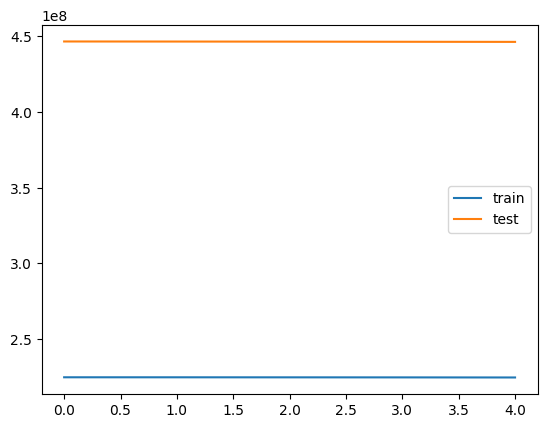

In [ ]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [ ]:
#evaluating the model based on the test data
loss, metrics = model.evaluate(X_test, y_test)

print('Mean Squared Error:', loss)
print('Mean Absolute Error:', metrics)

1/1 [==============================] - 0s 43ms/step - loss: 565379072.0000 - mean_absolute_error: 23690.0703
Mean Squared Error: 565379072.0
Mean Absolute Error: 23690.0703125


In [ ]:
#printing predicted outputs from test data
pred = model.predict(X_test)
print(pred)

1/1 [==============================] - 0s 60ms/step
[[0.00959578]
 [0.00958294]
 [0.00961161]
 [0.00954113]
 [0.00951443]
 [0.00952857]
 [0.00947755]
 [0.009317  ]
 [0.0089601 ]
 [0.00882078]
 [0.00852035]
 [0.00855299]]


In [ ]:
#input new data for all values in 2023 Q1 to predict GDP for the quarter

new_data = pd.read_csv('2023Q1_Prediction.csv', parse_dates = ['observation_date'], index_col = 'observation_date')
X2 = np.hstack([new_data.values, np.ones((new_data.shape[0], 1))])
X2 = np.reshape(X2, (X2.shape[0], X2.shape[1], 1))


In [ ]:
Q1_pred = model.predict(X2)

1/1 [==============================] - 1s 837ms/step


In [ ]:
print(Q1_pred)

[[0.00868412]
 [0.00857543]
 [0.00850786]]
